In [1]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
from scipy.stats import binom

import matplotlib
from matplotlib import pyplot as plt

In [2]:
def init_matplotlib(figsize=(16, 6), bgcolor="#FFFFFF"):
    matplotlib.rcParams["figure.figsize"] = figsize
    matplotlib.rcParams["figure.facecolor"] = bgcolor

## Probability of getting a perfect point-adjust recall with different numbers of randomly selected points

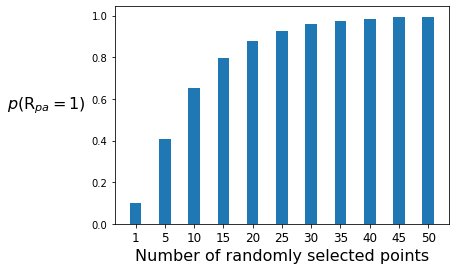

In [3]:
contamination_rate = 0.1

n = [1] + np.arange(5, 50 + 1, 5).tolist()

# compute the probability of getting zero success (k = 0)
# with different values of n
probas = binom.pmf(k=0, n=n, p=contamination_rate)

# deduce the probability of getting at least one success
probas = 1 - probas

plt.bar(np.arange(len(n)), probas, width=0.4)
_ = plt.xticks(np.arange(len(n)), n)

plt.xticks(fontsize=12)
plt.xlabel("Number of randomly selected points", fontsize=16)
plt.ylabel("$p($" + "R$_{pa}=1)$", rotation=0, labelpad=45, fontsize=16)

# plt.savefig("figures/prob-perfect-R-pa-diff-alpha.png", dpi=600, bbox_inches="tight")

## Expected point-adjust F1 with 50 random points and different segment lengths
While the contamination rate and the number of randomly selected points are constant (0.1 and 50 respectively), different segment lengths yield different expected $\text{F1}_{pa}$ values. For a segment length of over 500 points (mostly corresponding to datasets like SWaT and Wadi), the expected $\text{F1}_{pa}$ score is $>0.95$.

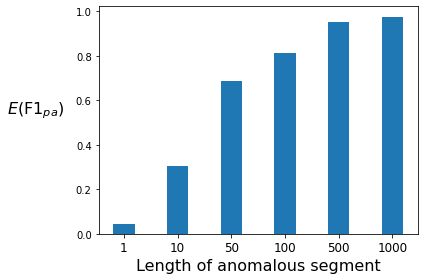

In [4]:
exp_F1_pa = []
anomalous_seg_len = [1, 10, 50, 100, 500, 1000]
for A in anomalous_seg_len:

    # take the highest value of n (50)
    N = 50
    k = np.arange(0, N + 1)

    pmf = binom.pmf(k=k, n=N, p=0.1)

    # point-adjust recall is 0 only when k == 0
    R_pa = np.ones_like(k)
    R_pa[0] = 0

    # compute point-adjust precision
    TP = np.ones_like(k) * A
    TP[0] = 0
    FP = N - k
    P_pa = TP / (TP + FP)

    F1_pa = (2 * P_pa * R_pa) / (P_pa + R_pa + 0.0001)

    exp_F1_pa.append((F1_pa * pmf).sum())

plt.bar(np.arange(len(exp_F1_pa)), exp_F1_pa, width=0.4)
_ = plt.xticks(np.arange(len(anomalous_seg_len)), anomalous_seg_len)

plt.xticks(fontsize=12)
plt.xlabel("Length of anomalous segment", fontsize=16)
plt.ylabel("$E($" + "F1$_" + "{" + "pa" + "})$", rotation=0, labelpad=40, fontsize=16)
plt.tight_layout()

# plt.savefig("figures/exp-f1-pa.png", dpi=600, bbox_inches="tight")